### Set up notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme(context="notebook")

In [4]:
nvals = 24*4

## Grid emissions

For 2023, which is the most recent available

in kgCO2/kWhe

In [43]:
filepath = Path('.') / "SGIP_CAISO_PGE"
l = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
filesnames = ["SGIP_CAISO_PGE_2023-" + i +"_ALL_MOER_VERSIONS.csv" for i in l]
df = pd.concat([pd.read_csv(filepath / f) for f in filesnames])
df = pd.concat([df, pd.read_csv(filepath / "SGIP_CAISO_PGE_2024-01_ALL_MOER_VERSIONS.csv")])
df['timestamp'] = pd.to_datetime(df['timestamp'])
# time is UTC+0 in the csv
df['timestamp'] = df['timestamp'].dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
df.set_index('timestamp', inplace=True)
df = df.loc['2023']
df = df.resample("15min").mean()
len(df)

35040

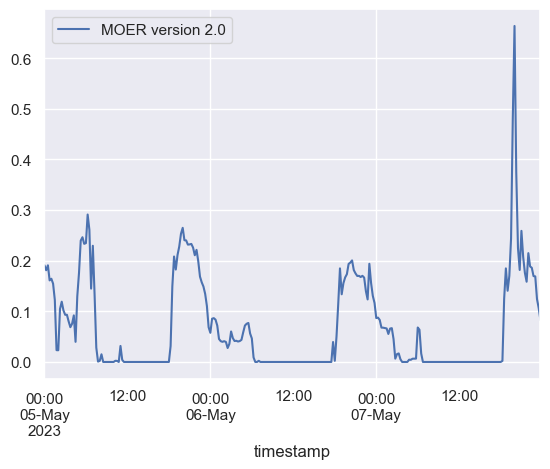

In [44]:
df.loc['2023-05-05':'2023-05-07'].plot();

In [45]:
df.to_csv("power_grid_emissions.csv")

## Gas emissions

in kgCO2/kWhgas

based on https://www.epa.gov/energy/greenhouse-gases-equivalencies-calculator-calculations-and-references : 0.0550 metric tons CO2/Mcf

per kWh, since 1 Mcf of gas = 300 kWh

In [55]:
#em = np.round(0.0550 * 1000 / 300, 3) # kgCO2/kWh Selon ce qui est commenté.
em = 0.231 # d'après l'ADEME. À voir lequel on prend

In [56]:
datetime_index = pd.date_range(start='2019-01-01', end='2019-12-31 23:45:00', freq='15min')
df = pd.DataFrame(index=datetime_index)
df['gasEmissions'] = em

In [57]:
df.to_csv("gas_emissions.csv")